# Synaptic Opto Analysis
Notebook to analyze synaptic responses to input-specific optogenetic stimulation

In [1]:
# Import modules
import os
import numpy as np
from Lab_Analyses.Behavior.process_multi_session_behavior import process_multi_session_behavior
from Lab_Analyses.Optogenetics.synaptic_opto_processing import synaptic_opto_processing
import Lab_Analyses.Optogenetics.synaptic_opto_plotting as plotting
from Lab_Analyses.Optogenetics.synaptic_opto_dataclass import Grouped_Synaptic_Opto_Data


In [2]:
# Setup mice list and parameters
## Mouse ids
id_1 = "JW327"
id_2 = "JW329"

## Number of sessions for behavior
days_1 = ["240607"]
days_2 = ["240608"]

mouse_ids = [id_1, id_2]
days = [days_1, days_2]

## Other parameters
fov_type = "apical"

base_path = r'Z:\People\Jake\Behavior'

## Process behavioral data

In [ ]:
for mouse, day in zip(mouse_ids, days):
    print(f"---------------------\nAnalyzing Mouse {mouse}")
    process_multi_session_behavior(mouse_id=mouse, base_path=base_path, days=day, save=True)
    print(f"                           ", end="\r")
    print("Done")

## Analyze optogenetic responses

In [3]:
opto_data = []
for mouse in mouse_ids:
    opto = synaptic_opto_processing(mouse_id=mouse, fov_type="apical", save=True)
    opto_data.append(opto)
    
opto_data = [j for i in opto_data for j in i]

----------------------------------------------------
Analyzing Mouse JW327
- Organizing FOV1_apical data
----------------------------------------------------
Analyzing Mouse JW329
- Organizing FOV1_apical data


## Visualize data

In [4]:
# Group data
grouped_data = Grouped_Synaptic_Opto_Data(opto_data)

In [5]:
len(grouped_data.responsive_spines)

137

In [6]:
len(opto_data[0].spine_dendrite)

64

In [7]:
grouped_data.spine_positions

array([ 1.66209078,  1.03334865,  2.88964743,  6.71918591,  7.72874497,
        8.77777516,  9.6211761 , 10.62534808, 12.06734465, 16.53938308,
       17.45622732, 18.50037304, 19.49778853, 20.04377575, 21.31443355,
       21.45791269, 24.65968275, 28.08845112, 29.6394498 , 35.83477191,
       36.85646902, 37.44117274, 41.72130206, 42.62715779, 43.32253601,
       44.9424518 , 45.08667593, 47.2227639 , 46.49707416, 47.8974117 ,
       47.4803728 , 49.28567966, 50.27570982, 49.77120104, 51.19658266,
       53.05028422, 53.76375177, 54.96467389, 56.83320996, 56.74590812,
       58.17216213, 59.61698568, 61.49546754, 62.77300847, 65.26781547,
       64.33295231, 66.47151007, 68.07965861, 67.35837417, 72.42599252,
       75.39817997, 75.75492238, 77.98850036, 78.09830808, 79.3286075 ,
       83.60682899, 85.12657941, 85.22632278, 88.1788365 , 89.8738506 ,
       92.32545783, 91.55755141, 93.93774016, 95.72001932,  0.89715702,
        3.51505938,  4.65478216,  5.49612297,  7.32813142,  9.28

In [8]:
figure_path = r"C:\Users\Jake\Desktop\Figures\grouped_data\Spine_Opto\thal_test"

### Plot session activity

In [ ]:
print(opto_data[0].spine_z_dFoF.shape)
print(opto_data[1].spine_z_dFoF.shape)
grouped_data.spine_processed_dFoF.shape

In [ ]:
plotting.plot_session_activity(
    dataset=grouped_data,
    identifier={"mouse_id": "JW329", "FOV": "FOV1_apical"},
    zscore=False,
    figsize=(7,8),
    save=False,
    save_path=None
)

getting mouse data
processing
Responsive idxs: [(0, 64), (7, 71), (70, 134)]
Non-responsive idxs: [(28, 92), (32, 96), (72, 136)]
plotting


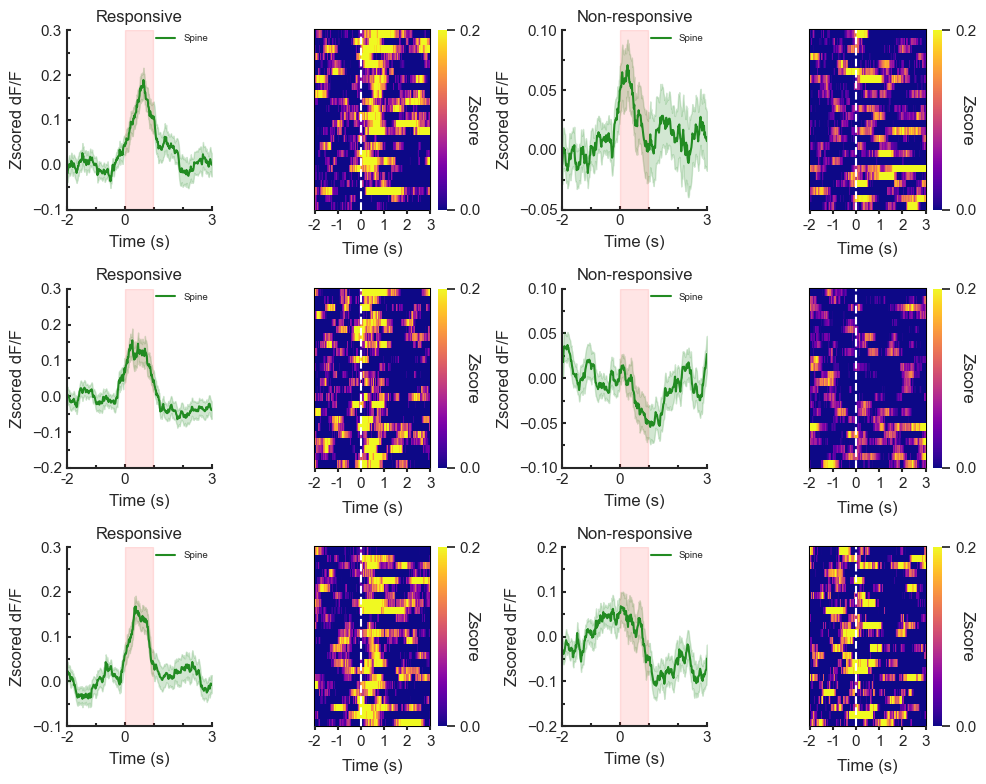

In [32]:
plotting.plot_individual_examples(
    dataset=grouped_data,
    identifiers={"mouse_id": "JW329", "FOV": "FOV1_apical"},
    hmap_range=(0, 0.2),
    figsize=(10,8),
    norm=False,
    save=False,
    save_path=figure_path,
)

In [10]:
sum(grouped_data.responsive_spines)

32.0

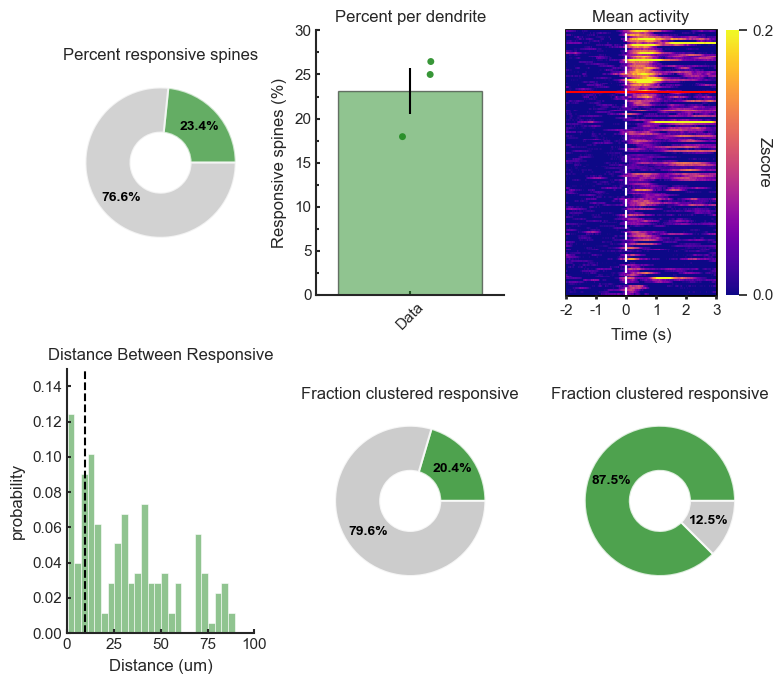

In [36]:
plotting.plot_responsive_synapse_properties(
    dataset=grouped_data,
    cluster_dist=10,
    hmap_range=(0,0.2),
    figsize=(8,7),
    save=False,
    save_path=figure_path
)

[  2   3   4   6  10  11  12  13  28  33  40  42  52  58  59  60  64  66
  67  69  71  73  74  81  90 104 105 106 109 121 129 134]
[1.02298681 1.00742481 0.53432452 0.6433306  2.58287044 0.90061483
 1.56042841 0.80434428 1.14220358 0.67036039 1.04093941 0.85511956
 1.03232751 1.27095121 0.35420642 1.63879254 3.87951646 0.47829802
 0.73823477 0.71426352 0.56653281]
0.9006148270222224
0.9476512821996971
MannwhitneyuResult(statistic=717.0, pvalue=0.5935922526515474)


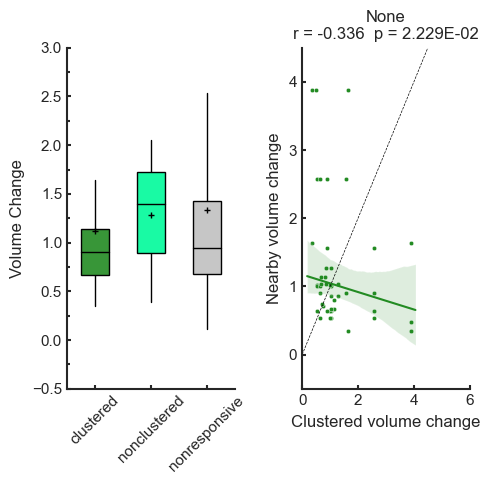

In [35]:
plotting.plot_plasticity(
    dataset=grouped_data,
    figsize=(5,5),
    cluster_dist=10,
    test_type="nonparametric",
    test_method="fdr_tsbh",
    save=False,
    save_path=None
)

In [ ]:
data = np.load(r"G:\Analyzed_data\individual\JW157\population_data\JW157_Early_population_data.npy")


In [ ]:
data.shape

In [ ]:
new_x

In [ ]:
X

In [ ]:
>>> from sklearn import datasets, linear_model
>>> from sklearn.model_selection import cross_validate
>>> from sklearn.metrics import make_scorer
>>> from sklearn.metrics import confusion_matrix
>>> from sklearn.svm import LinearSVC
>>> diabetes = datasets.load_diabetes()
>>> X = diabetes.data[:150]
>>> y = diabetes.target[:150]
>>> lasso = linear_model.Lasso()

In [ ]:
>>> cv_results = cross_validate(lasso, X, y, cv=3, return_train_score=True, return_estimator=True, return_indices=True)
>>> sorted(cv_results.keys())


In [ ]:
a = np.array([0,1,1,0])
b = np.array([not x for x in a]).astype(int)
b

In [ ]:
a = np.array([[1,1,1],
              [1,1,1]])
b = a * 2
np.stack([a,b]).mean(axis=0)

In [ ]:
np.concatenate(a)